# Example how-to create a signal time PDF

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from skyllh.core.detsigyield import NullDetSigYieldBuilder
from skyllh.core.livetime import Livetime
from skyllh.core.model import SourceModel
from skyllh.core.parameters import ParameterModelMapper
from skyllh.core.signalpdf import SignalTimePDF
from skyllh.core.source_hypo_grouping import (
    SourceHypoGroup,
    SourceHypoGroupManager,
)
from skyllh.core.storage import DataFieldRecordArray
from skyllh.core.trialdata import TrialDataManager
from skyllh.physics.flux_model import (
    BoxTimeFluxProfile,
    NullFluxModel,
)

In [2]:
livetime_data = np.array([
        [1, 3], 
        [4, 7],
        [8, 9],
    ],
    dtype=np.float64)
livetime = Livetime(livetime_data)

In [3]:
time_flux_profile = BoxTimeFluxProfile(t0=5, tw=6)
print(f't_start = {time_flux_profile.t_start}')
print(f't_stop = {time_flux_profile.t_stop}')

t_start = 2.0
t_stop = 8.0


In [4]:
sigpdf = SignalTimePDF(
    pmm=None, 
    livetime=livetime, 
    time_flux_profile=time_flux_profile)

In [5]:
shg_mgr = SourceHypoGroupManager(
    SourceHypoGroup(
        sources=SourceModel(),
        fluxmodel=NullFluxModel(),
        detsigyield_builders=NullDetSigYieldBuilder())
)
pmm = ParameterModelMapper(models=shg_mgr.source_list)
t = np.linspace(0, 10, int(10/0.05))
events = DataFieldRecordArray(np.array(t, dtype=[('time', np.float64)]))
tdm = TrialDataManager()
tdm.initialize_trial(
    shg_mgr=shg_mgr, 
    pmm=pmm,
    events=events)

In [6]:
sigpdf.initialize_for_new_trial(tdm=tdm)
(pd, grads) = sigpdf.get_pd(
    tdm=tdm, 
    src_params_recarray=pmm.create_src_params_recarray([]))
total_integral = np.sum(pd[1:]*np.diff(t))
print(f'total integral = {total_integral}')

1.0050251256281408

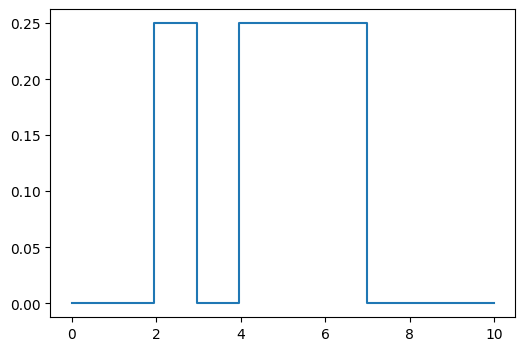

In [7]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.plot(t, pd, drawstyle='steps')

In [8]:
from skyllh.core.signalpdf import FixedBoxSignalTimePDF

In [9]:
grl = np.zeros(
    livetime_data.shape[0], 
    dtype=[('start', np.float64), ('stop', np.float64)])
grl['start'] = livetime_data[:, 0]
grl['stop'] = livetime_data[:, 1]
sigpdf2 = FixedBoxSignalTimePDF(grl=grl, start=2, stop=7)

[(1., 3.) (4., 7.) (8., 9.)]


In [10]:
sigpdf2.initialize_for_new_trial(tdm=tdm)
(pd, grads) = sigpdf2.get_pd(tdm=tdm, params_recarray=pmm.create_src_params_recarray([]))

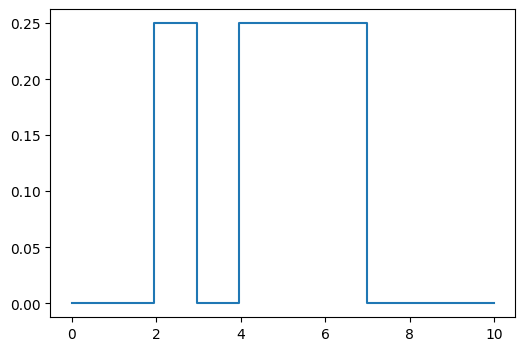

In [11]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.plot(t, pd, drawstyle='steps')

In [12]:
np.sum(pd[1:]*np.diff(t))

1.0050251256281408